In [7]:
%matplotlib inline
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets.widgets import Text, FloatSlider, IntSlider, RadioButtons
from ipywidgets.widgets import Checkbox

print(sys.version)
print(sys.prefix)

3.7.6 (default, Jan  8 2020, 13:42:34) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
/Users/jstrick/opt/anaconda3


In [8]:
text = Text()  # text input widget

# event handler for input widget
def handle_submit(input_text):
    print(input_text.value.upper())
    print("input_text:", input_text)

text.on_submit(handle_submit)  # add handler to widget
display(text)  # 

Text(value='')

AAA
input_text: Text(value='aaa')
BBB
input_text: Text(value='bbb')
BBBCCC
input_text: Text(value='bbbccc')
EAT ME YOU MALODOROUS NEWT
input_text: Text(value='eat me you malodorous newt')


Let's read in the data.

In [9]:

sns.set_style('dark')

df = pd.read_csv(
    '../DATA/airport_boardings.csv',
    thousands=',',
    skipinitialspace=True,
)

df.head()


,Airport,Code,2001 Rank,2001 Total,2010 Rank,2010 Total,2011 Rank,Total,Percent change 2001-2011,Percent change 2010-2011
0,"Atlanta, GA (Hartsfield-Jackson Atlanta Intern...",ATL,1,36384264,1,42655392,1,33034788,-9.2,-22.6
1,"Chicago, IL (Chicago O'Hare International)",ORD,2,28626694,2,30033313,2,22367052,-21.9,-25.5
2,"Dallas, TX (Dallas/Fort Worth International)",DFW,3,25198256,3,26785739,3,20430281,-18.9,-23.7
3,"Denver, CO (Denver International)",DEN,6,16397390,4,24965553,4,19190341,17.0,-23.1
4,"Los Angeles, CA (Los Angeles International)",LAX,4,22873307,5,22860849,5,18379418,-19.6,-19.6


Now let's plot the data

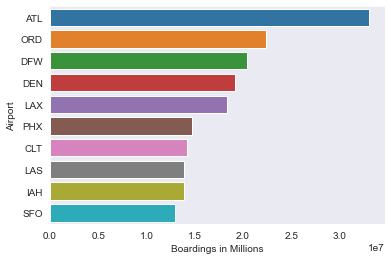

In [15]:
FIELD_TO_PLOT = 'Total'
NUM_ENTRIES = 10


sns.barplot(df[FIELD_TO_PLOT], df['Code'][:NUM_ENTRIES])

plt.xlabel('Boardings in Millions')
plt.ylabel('Airport')

plt.show()

So far so good. 
Now we want to add a slider widget. 

In [42]:
MIN_ENTRIES = 5
MAX_ENTRIES = len(df)


def update_chart(num_entries):
    ax = sns.barplot(df[FIELD_TO_PLOT], df['Code'][:num_entries])
    ax.set(xlabel='Boardings in Millions', ylabel='Airport')
    print(plt.xlim(), plt.ylim())
    f = plt.gcf()
    print(f)
    f.set_dpi(1000)
    plt.xlim(0, 40_000_000)
#    plt.ylim(plt.ylim()[0] * 2, 0)
    plt.show()


slider = IntSlider(min=MIN_ENTRIES, max=MAX_ENTRIES,step=1,value=min_entries)
interact(update_chart, num_entries=slider);


interactive(children=(IntSlider(value=5, description='num_entries', max=50, min=5), Output()), _dom_classes=('…

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot(amplitude, color, fat_line):
    fig, ax = plt.subplots(figsize=(4, 3),
                           subplot_kw={'facecolor':'#EEEEEE',
                                       'axisbelow':True})
    x = np.linspace(0, 10, 1000)
    ax.plot(x, amplitude * np.sin(x), color=color,
            lw=5 if fat_line else 1, alpha=0.4)
    ax.set_ylim(-1.1, 1.1)
    plt.show()
#     return fig


interact(
    plot,
    amplitude=FloatSlider(min=0.0, max=1, step=0.1, value=0.1),
    color=RadioButtons(options=['blue', 'green', 'red']),
    fat_line=Checkbox(value=False, label="Fat Line"),
)

interactive(children=(FloatSlider(value=0.1, description='amplitude', max=1.0), RadioButtons(description='colo…

<function __main__.plot(amplitude, color, fat_line)>